## 1. Initialisation de Spark et chargement des données

In [13]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("spam-detection-app").getOrCreate()
data = "data/DataSet_Emails.csv"
df = spark.read.csv(data,header=True,inferSchema=True,multiLine=True,escape='"')
df.show(200)

+---+----------+--------------------+-----+----------+--------------------+--------------------+----------+
|_c0|message_id|                text|label|label_text|             subject|             message|      date|
+---+----------+--------------------+-----+----------+--------------------+--------------------+----------+
|  0|     33214|any software just...|    1|      spam|any software just...|understanding oem...|2005-06-18|
|  1|     11929|perspective on fe...|    0|       ham|perspective on fe...|19 th , 2 : 00 pm...|2001-06-19|
|  2|     19784|wanted to try ci ...|    1|      spam|wanted to try ci ...|viagra at $ 1 . 1...|2004-09-11|
|  3|      2209|enron / hpl actua...|    0|       ham|enron / hpl actua...|teco tap 30 . 000...|2000-12-12|
|  4|     15880|looking for cheap...|    1|      spam|looking for cheap...|water past also ,...|2005-02-13|
|  5|     15726|emerging growth s...|    1|      spam|emerging growth s...|vera ,\nvcsc - br...|2005-01-18|
|  6|     21384|internet pro

## 2. Exploration du schéma et sélection des colonnes

In [14]:
df.printSchema()
df.cache()
df.count() 
df = df.select("text", "label")


root
 |-- _c0: integer (nullable = true)
 |-- message_id: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- label_text: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- message: string (nullable = true)
 |-- date: date (nullable = true)



25/11/27 00:40:44 WARN CacheManager: Asked to cache already cached data.


## 3. Détection des valeurs nulles

In [15]:
from pyspark.sql import functions as f

for i in df.columns:
    count_null = df.filter(df[i].isNull()).count()
    print(f"{i} : {count_null} valeurs nulles")    

text : 51 valeurs nulles
label : 0 valeurs nulles


## 4. Suppression des valeurs nulles

In [16]:
df = df.na.drop(subset=["text"])

## 5. Comptage des emails spam et non-spam

In [17]:
count_spam_emails = df.filter(f.col("label_text")=="spam").count()
count_not_spam_email = df.filter(f.col("label_text")=="ham").count()
print(f"spam emails = {count_spam_emails}")
print(f"not spam emails = {count_not_spam_email}")

spam emails = 16112
not spam emails = 15553


## 6. Visualisation de la distribution des labels

<Axes: xlabel='label', ylabel='count'>

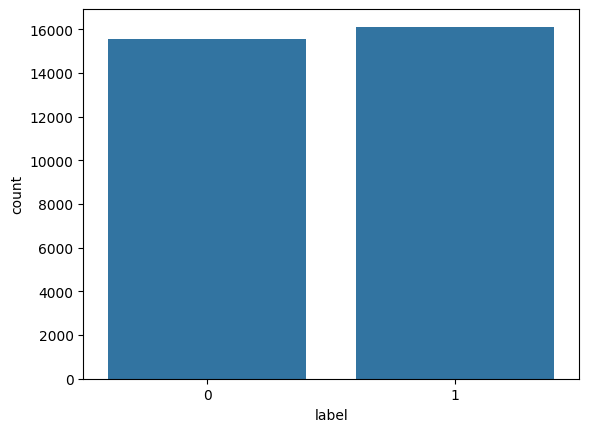

In [19]:
df1 = df.toPandas()
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sbn

sbn.countplot(data=df1,x="label")
